# <a id='toc1_'></a>[Projet 1 : Participez  un concours sur la smart City](#toc0_)

![image.png](https://www.notre-planete.info/actualites/images/infrastructures/arbres-Paris.jpg)

**Table of contents**<a id='toc0_'></a>    
- [Projet 1 : Participez  un concours sur la smart City](#toc1_)    
  - [Contexte et règle : Concours Smart City](#toc1_1_)    
  - [Analyse des données](#toc1_2_)    
    - [Importation des librairies](#toc1_2_1_)    
    - [Importation du jeu de données (via fichier ou api)](#toc1_2_2_)    
    - [1ère Inspection du dataset](#toc1_2_3_)    
  - [Suppression et renommage des colonnes du dataset](#toc1_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Contexte et règle : Concours Smart City](#toc0_)
Vous avez décidé de participer à un challenge proposé par la ville de Paris ! Voici le cahier des charges du challenge, que vous avez trouvé sur le site :

Dans ce challenge, ouvert à tous, vous allez réaliser une analyse exploratoire avec un jeu de données portant sur les arbres de la ville de Paris, dans le cadre du programme “Végétalisons la ville”.

Vos résultats contribueront à une optimisation des tournées pour l’entretien des arbres de la ville. Eh oui, moins de tournées signifie moins de trajets, et plus d’arbres entretenus.

Vous aurez ainsi un impact réel sur le futur de la ville de Paris !

**Données**: 

Téléchargez le jeu de données des arbres de la ville de Paris. Vous pouvez aussi le consulter dans son contexte sur [opendata.paris.fr](https://opendata.paris.fr/explore/dataset/les-arbres/information/?dataChart=eyJxdWVyaWVzIjpbeyJjb25maWciOnsiZGF0YXNldCI6Imxlcy1hcmJyZXMiLCJvcHRpb25zIjp7fX0sImNoYXJ0cyI6W3siYWxpZ25Nb250aCI6dHJ1ZSwidHlwZSI6ImNvbHVtbiIsImZ1bmMiOiJBVkciLCJ5QXhpcyI6ImlkYmFzZSIsInNjaWVudGlmaWNEaXNwbGF5Ijp0cnVlLCJjb2xvciI6IiMwMDMzNjYifV0sInhBeGlzIjoidHlwZWVtcGxhY2VtZW50IiwibWF4cG9pbnRzIjo1MCwic29ydCI6IiJ9XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&disjunctive.typeemplacement&disjunctive.arrondissement&disjunctive.libellefrancais&disjunctive.genre&disjunctive.espece&disjunctive.varieteoucultivar&disjunctive.stadedeveloppement&disjunctive.remarquable&location=13,48.86838,2.30953&basemap=jawg.streets) 

**Règles du challenge** :

- Si ce n’est pas fait, installez votre environnement de développement sur votre ordinateur, et créez un environnement virtuel dédié à ce challenge.
- Les données doivent être explorées à l’aide de Python et de ses librairies. 
- Vous soumettrez votre analyse sous forme de présentation, contenant les informations suivantes :
- Présentation générale du jeu de données
- Démarche méthodologique d’analyse de données 
- Synthèse de l’analyse de données

- Le second livrable prendra la forme d’un Notebook Jupyter. 
Le Notebook sera documenté pour expliciter les différents traitements, calculs ou graphiques que vous effectuez en utilisant les fonctionnalités d’édition de texte de Jupyter. Vos explications doivent permettre à un public non technique de comprendre les différentes étapes de votre analyse et votre synthèse.

## <a id='toc1_2_'></a>[Analyse des données](#toc0_)

### <a id='toc1_2_1_'></a>[Importation des librairies](#toc0_)

In [1]:
# Library Import
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt

### <a id='toc1_2_2_'></a>[Importation du jeu de données (via fichier ou api)](#toc0_)

In [2]:
# Read csv dataset from folder 'dataset' contain CSV with separator ;
df_arbre = pd.read_csv('dataset/les-arbres.csv',sep=";")

In [3]:
# Use API for read CSV dataset without downloading CSV files

# Define the API endpoint URL


api_url = "https://opendata.paris.fr/api/explore/v2.0/catalog/datasets/les-arbres/exports/csv?delimiter=%3B&list_separator=%2C&quote_all=false&with_bom=false"

# Make GET request to the API
response = requests.get(api_url)
print(response)
# Check if the request was successful (status code 200)
if response.status_code == 200:

    df_arbre = pd.read_csv(api_url,sep=";")
else:
    print("Request failed with status code:", response.status_code)


<Response [200]>


### <a id='toc1_2_3_'></a>[1ère Inspection du dataset](#toc0_)

Nous allons vérifier que notre Dataframe c'est bien chargé en affichant les deux première ligne de notre Dataframe **df_arbre**

In [4]:
# View 2 first row of dataframe
df_arbre.head(2)

,idbase,typeemplacement,domanialite,arrondissement,complementadresse,numero,adresse,idemplacement,libellefrancais,genre,espece,varieteoucultivar,circonferenceencm,hauteurenm,stadedeveloppement,remarquable,geo_point_2d
0,162774,Arbre,CIMETIERE,VAL-DE-MARNE,NaN,NaN,CIMETIERE DE THIAIS / AVENUE TRANSVERSALE N3 /...,A15100119006,Platane,Platanus,x hispanica,NaN,0,0,NaN,NaN,"48.756530477583226, 2.380136897302042"
1,191355,Arbre,DFPE,PARIS 15E ARRDT,NaN,NaN,FREDERIC MISTRAL (10 VILLA),21220003,Orme,Ulmus,NaN,RESISTA,65,8,Jeune (arbre),NON,"48.83822312160151, 2.2863961319531456"


Regardons maintenant combien de lignes et de colonnes nous avons dans notre dataframe

In [5]:
# See the shape of dataframe
f"Notre dataset contient {df_arbre.shape[0]} lignes et {df_arbre.shape[1]} colonnes pour décrire nos données."

'Notre dataset contient 207580 lignes et 17 colonnes pour décrire nos données.'

Vérifions si les types des données des colonnes sont appropriés

In [6]:
# See types of values in the dataframe
df_arbre.dtypes

idbase                  int64
typeemplacement        object
domanialite            object
arrondissement         object
complementadresse      object
numero                float64
adresse                object
idemplacement          object
libellefrancais        object
genre                  object
espece                 object
varieteoucultivar      object
circonferenceencm       int64
hauteurenm              int64
stadedeveloppement     object
remarquable            object
geo_point_2d           object
dtype: object

Pandas a bien converti nos données dans le bon type il n'aura pas de conversion sur le types de données à faire

Regardons maintenant le taux de valeurs manquantes dans chaque colonnes

In [7]:
# See Nan values on dataframe
df_arbre.isna().mean()

idbase                0.000000
typeemplacement       0.000000
domanialite           0.000000
arrondissement        0.000000
complementadresse     0.723008
numero                1.000000
adresse               0.000000
idemplacement         0.000000
libellefrancais       0.005839
genre                 0.000010
espece                0.011947
varieteoucultivar     0.808826
circonferenceencm     0.000000
hauteurenm            0.000000
stadedeveloppement    0.228717
remarquable           0.109095
geo_point_2d          0.000000
dtype: float64

Observation sur les valeurs manquantes : 
- La colonne **typeemplacement** contient seulement mention 'Arbre' pour chaque valeur (colonne à supprimer)
- La colonne **numero** contient que des valeurs nulles (colonne à supprimer)
- La colonne **complementadresse** contient **72%** de valeurs nulle, cette colonne ne nous servira pas pour notre analyse (colonne à supprimer)

### Vérification des duplicatas
Chaque arbre de paris a un identifiant unique valeur contenu dans la colonne **idbase** vérifions que chaque valeurs est bien unique

In [8]:
# Create variable for see all duplicate value in idbase column
duplicated_values = df_arbre[df_arbre['idbase'].duplicated(keep=False)]

# Print the duplicated values to see all values of two
display(duplicated_values)


,idbase,typeemplacement,domanialite,arrondissement,complementadresse,numero,adresse,idemplacement,libellefrancais,genre,espece,varieteoucultivar,circonferenceencm,hauteurenm,stadedeveloppement,remarquable,geo_point_2d
33213,227160,Arbre,Alignement,PARIS 6E ARRDT,NaN,NaN,PORT DES SAINTS PERES / QUAI MALAQUAIS,000201008,Peuplier,Populus,alba,''Raket'',165,15,NaN,NON,"48.85831741176347, 2.3344414199576278"
97283,227160,Arbre,Alignement,PARIS 6E ARRDT,NaN,NaN,PORT DES SAINTS PERES / QUAI MALAQUAIS,000201008,Peuplier,Populus,alba,''Raket'',20,5,Jeune (arbre),NON,"48.85831741176347, 2.3344414199576278"


In [9]:
# Drop the duplicated values and keep the values with more information
df_arbre = df_arbre.drop_duplicates(keep='first')

Notre dataset contient un seul arbre en double, nous avons choisi de gardé la valeur de la ligne 91478 qui contient plus d'information sur l'arbre.

### Arbre remarquable 
La colonne 'remarquable' contient deux valeurs soit 'NON' ou 'OUI' soit 'Nan'. On sait que notre colonne contient environ **10 %** de valeurs nulle.
Pour vérifier le nombre d'arbre remarquable à paris nous allons vérifier nos données grâce a un autre dataset comptabilisant les arbres remarquable [disponible ici](https://opendata.paris.fr/explore/dataset/arbresremarquablesparis/).

- Quesqu'un arbre remarquable ?

Selon l'observatoire des arbres de paris un arbre remarquable se distingue selon plusieurs caractéristiques :
> "La beauté, l’âge, les dimensions, l’histoire, les légendes, les coutumes, la rareté, les curiosités sont autant d’éléments qui permettent d’identifier des arbres hors du commun. Le caractère remarquable d’un arbre reste toutefois librement appréciable."

Comparons maintenant les arbres remarquables de notre dataset avec celui contenant spécifiquement les arbres remarquables

In [21]:
# Compare values of dataset on tree remarquable 

# Use API for read CSV dataset without downloading CSV files

# Define the API endpoint URL
api_url = "https://opendata.paris.fr/api/explore/v2.0/catalog/datasets/arbresremarquablesparis/exports/csv?delimiter=%3B&list_separator=%2C&quote_all=false&with_bom=false"

# Make GET request to the API
response = requests.get(api_url)
print(response)
# Check if the request was successful (status code 200)
if response.status_code == 200:

    df_remarquable = pd.read_csv(api_url,sep=";")
else:
    print("Request failed with status code:", response.status_code)

df_remarquable['arbres_idbase'] = df_remarquable['arbres_idbase'].astype('int64')
df_remarquable = df_remarquable.sort_values('arbres_idbase')

<Response [200]>


In [24]:
# Create a dataframe with only remarquable trees 
df_arbre_remarquable = df_arbre[df_arbre['remarquable'] == 'OUI']
df_remarquable = df_remarquable.rename(columns={"arbres_idbase":"idbase"})
merged_df = pd.merge(df_arbre_remarquable,df_remarquable, on='idbase', how='outer',indicator=True)

In [13]:
df_remarquable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 146 to 67
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   geom_x_y                   177 non-null    object 
 1   arbres_idbase              177 non-null    int64  
 2   arbres_domanialite         177 non-null    object 
 3   arbres_arrondissement      177 non-null    object 
 4   arbres_complementadresse   133 non-null    object 
 5   arbres_numero              0 non-null      float64
 6   arbres_adresse             177 non-null    object 
 7   arbres_circonferenceencm   177 non-null    float64
 8   arbres_hauteurenm          177 non-null    float64
 9   arbres_stadedeveloppement  176 non-null    object 
 10  arbres_pepiniere           177 non-null    object 
 11  arbres_genre               177 non-null    object 
 12  arbres_espece              177 non-null    object 
 13  arbres_varieteoucultivar   15 non-null     object

In [27]:
df_remarquable = df_remarquable.rename(columns={"arbres_idbase":"idbase"})
merged_df = pd.merge(df_arbre_remarquable,df_remarquable, on='idbase', how='outer',indicator=True)

In [35]:
display(merged_df[merged_df['_merge']=='left_only'])

,idbase,typeemplacement,domanialite,arrondissement,complementadresse,numero,adresse,idemplacement,libellefrancais,genre,...,com_qualification_rem,com_resume,com_descriptif,com_delib_num,com_delib_date,com_label_arbres,com_url_pdf,com_url_photo1,com_copyright1,_merge
46,102140,Arbre,Jardin,PARIS 19E ARRDT,NaN,NaN,PARC DES BUTTES CHAUMONT,H0690011,Platane,Platanus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
60,2002393,Arbre,Jardin,BOIS DE BOULOGNE,16-11,NaN,PETITE ILE DU LAC INFERIEUR,000801001,Hêtre,Fagus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
72,102139,Arbre,Jardin,PARIS 19E ARRDT,NaN,NaN,PARC DES BUTTES CHAUMONT,H0690013,Platane,Platanus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [36]:
display(merged_df[merged_df['_merge']=='right_only'])

,idbase,typeemplacement,domanialite,arrondissement,complementadresse,numero,adresse,idemplacement,libellefrancais,genre,...,com_qualification_rem,com_resume,com_descriptif,com_delib_num,com_delib_date,com_label_arbres,com_url_pdf,com_url_photo1,com_copyright1,_merge
179,178840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Historique,Cet arbre est classé remarquable pour son cara...,"En 1860, Louis Pasteur aurait fait planter ce ...",NaN,NaN,NaN,https://capgeo.sig.paris.fr/PdfEtImages/Arbres...,https://capgeo.sig.paris.fr/PdfEtImages/Arbres...,NaN,right_only


In [31]:
merged_df['_merge'].value_counts()

both          176
left_only       3
right_only      1
Name: _merge, dtype: int64

## Analyse graphique

In [ ]:
# Change column to capitalize values
df_arbre['arrondissement'] = df_arbre['arrondissement'].str.capitalize()

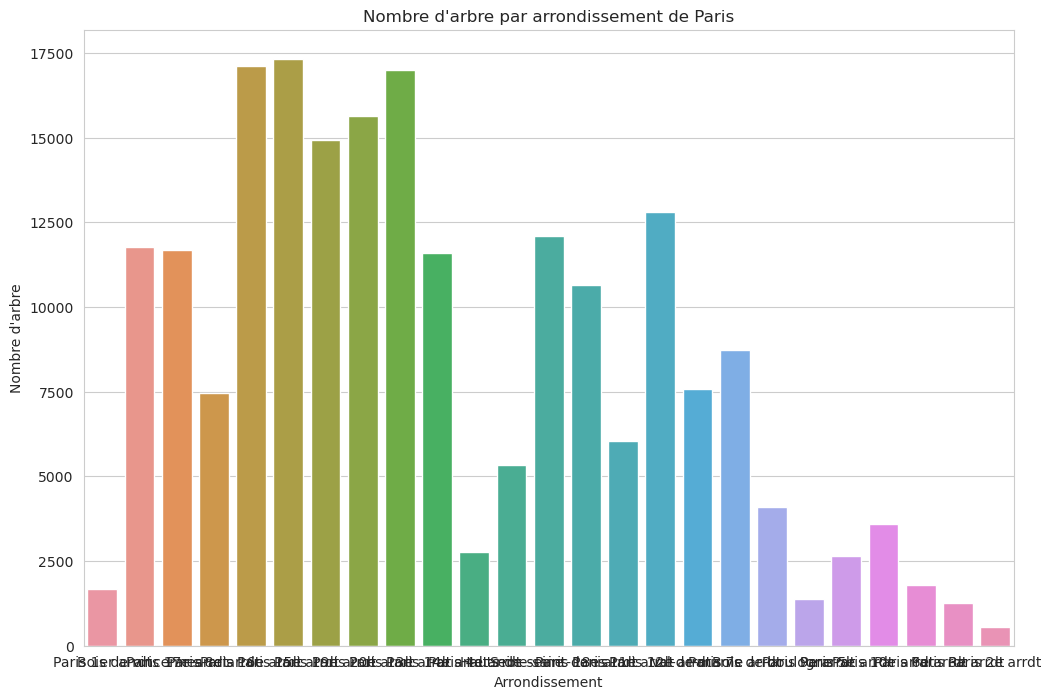

In [ ]:
# Set theme
sns.set_style('whitegrid')
sns.color_palette("Set2")
# Set the figure size
plt.figure(figsize=(12, 8))
sns.countplot(x=df_arbre["arrondissement"])
plt.xlabel('Arrondissement',fontsize=10)
plt.ylabel("Nombre d'arbre")
plt.title("Nombre d'arbre par arrondissement de Paris")
plt.show()

### <a id='toc1_3_'></a>[Suppression et renommage des colonnes du dataset](#toc0_)